In [1]:
import sys
sys.path.insert(0, '/Volumes/GoogleDrive/.shortcut-targets-by-id/1TlzU2Kb_sVqH6O3SZ_gaC4kqBXYYltvK/All_women Data Sience/_functions_')

from functions_plot_EDA import *
from fx_MLRegression import *

In [2]:
df_wt = pd.read_csv('../_datasets/3.1._WT_2017_wt1.csv',parse_dates =[1], delimiter=',', skipinitialspace = True, decimal ='.')
df_wt

,turbine,time,wind_avg_ms,wind_max_ms,wind_min_ms,rot_speed_avg_1m,rot_speed_max_1m,rot_speed_min_1m,power_avg_kw,power_max_kw,power_min_kw,power_wind_kw,power_tech_kw,power_forcemaj_kw,power_ext_kw,tot_en_prod_kwh,en_prod_kwh,blade_angle,op_hours,nacelle_pos
0,WT1,2017-01-01 00:10:00,6.2,7.2,5.5,9.39,9.63,9.06,638,689,544,638,638,638,638,24353178,104,1.0,1180 days 14:40:00,240
1,WT1,2017-01-01 00:20:00,6.2,7.4,5.5,9.53,9.79,9.17,666,721,593,666,666,666,666,24353286,108,1.0,1180 days 14:50:00,242
2,WT1,2017-01-01 00:30:00,6.2,7.3,5.3,9.17,9.54,8.81,594,670,499,596,596,596,596,24353381,95,1.0,1180 days 15:00:00,243
3,WT1,2017-01-01 00:40:00,6.1,7.3,4.9,8.61,9.04,8.28,480,567,412,482,482,482,482,24353458,77,1.0,1180 days 15:10:00,237
4,WT1,2017-01-01 00:50:00,5.8,7.7,4.7,8.48,8.80,8.17,454,518,390,455,455,455,455,24353531,73,1.0,1180 days 15:20:00,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52252,WT1,2017-12-31 23:10:00,14.0,19.5,10.0,14.68,15.39,13.86,3069,3131,3001,3070,3070,3070,3070,31893213,510,11.7,1515 days 04:42:00,204
52253,WT1,2017-12-31 23:20:00,13.5,17.3,9.2,14.70,15.67,14.12,3068,3119,2899,3070,3070,3070,3070,31893723,510,8.9,1515 days 04:52:00,209
52254,WT1,2017-12-31 23:30:00,14.3,19.5,8.0,14.69,15.78,14.07,3070,3121,3014,3070,3070,3070,3070,31894234,511,11.0,1515 days 05:02:00,210
52255,WT1,2017-12-31 23:40:00,13.8,19.4,8.7,14.69,15.33,13.95,3069,3114,3016,3070,3070,3070,3070,31894744,510,9.3,1515 days 05:12:00,210


In [3]:
df_weather = pd.read_csv('../_datasets/3.1._completeweather_2017.csv',parse_dates =[0], delimiter=',', skipinitialspace = True, decimal ='.')
df_weather

,time,windspeed_gr,direct_ground,atmo_press_hpa,air_t,tm_5cm,rel_hum_2m,dew_t_2m,year
0,2017-01-01 00:00:00,3.4,230,982.1,-3.9,-5.5,85.3,-6.0,2017
1,2017-01-01 00:10:00,3.1,230,981.9,-3.9,-5.6,85.8,-5.9,2017
2,2017-01-01 00:20:00,2.7,230,981.7,-4.1,-5.8,86.2,-6.1,2017
3,2017-01-01 00:30:00,2.9,220,981.6,-4.1,-5.8,85.8,-6.1,2017
4,2017-01-01 00:40:00,3.5,230,981.5,-4.0,-5.7,83.7,-6.4,2017
...,...,...,...,...,...,...,...,...,...
50964,2017-12-31 23:10:00,7.9,220,957.3,10.3,8.2,73.3,5.7,2017
50965,2017-12-31 23:20:00,8.2,220,957.3,10.1,8.7,74.5,5.8,2017
50966,2017-12-31 23:30:00,7.9,220,957.3,10.3,8.5,72.5,5.6,2017
50967,2017-12-31 23:40:00,7.9,220,957.2,10.3,8.7,72.2,5.5,2017


In [4]:
df = pd.merge(df_wt,df_weather,on='time', how='left')
df

,turbine,time,wind_avg_ms,wind_max_ms,wind_min_ms,rot_speed_avg_1m,rot_speed_max_1m,rot_speed_min_1m,power_avg_kw,power_max_kw,...,op_hours,nacelle_pos,windspeed_gr,direct_ground,atmo_press_hpa,air_t,tm_5cm,rel_hum_2m,dew_t_2m,year
0,WT1,2017-01-01 00:10:00,6.2,7.2,5.5,9.39,9.63,9.06,638,689,...,1180 days 14:40:00,240,3.1,230.0,981.9,-3.9,-5.6,85.8,-5.9,2017.0
1,WT1,2017-01-01 00:20:00,6.2,7.4,5.5,9.53,9.79,9.17,666,721,...,1180 days 14:50:00,242,2.7,230.0,981.7,-4.1,-5.8,86.2,-6.1,2017.0
2,WT1,2017-01-01 00:30:00,6.2,7.3,5.3,9.17,9.54,8.81,594,670,...,1180 days 15:00:00,243,2.9,220.0,981.6,-4.1,-5.8,85.8,-6.1,2017.0
3,WT1,2017-01-01 00:40:00,6.1,7.3,4.9,8.61,9.04,8.28,480,567,...,1180 days 15:10:00,237,3.5,230.0,981.5,-4.0,-5.7,83.7,-6.4,2017.0
4,WT1,2017-01-01 00:50:00,5.8,7.7,4.7,8.48,8.80,8.17,454,518,...,1180 days 15:20:00,225,3.8,230.0,981.5,-3.9,-5.6,80.5,-6.8,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52252,WT1,2017-12-31 23:10:00,14.0,19.5,10.0,14.68,15.39,13.86,3069,3131,...,1515 days 04:42:00,204,7.9,220.0,957.3,10.3,8.2,73.3,5.7,2017.0
52253,WT1,2017-12-31 23:20:00,13.5,17.3,9.2,14.70,15.67,14.12,3068,3119,...,1515 days 04:52:00,209,8.2,220.0,957.3,10.1,8.7,74.5,5.8,2017.0
52254,WT1,2017-12-31 23:30:00,14.3,19.5,8.0,14.69,15.78,14.07,3070,3121,...,1515 days 05:02:00,210,7.9,220.0,957.3,10.3,8.5,72.5,5.6,2017.0
52255,WT1,2017-12-31 23:40:00,13.8,19.4,8.7,14.69,15.33,13.95,3069,3114,...,1515 days 05:12:00,210,7.9,220.0,957.2,10.3,8.7,72.2,5.5,2017.0


In [5]:
df.dropna(how='any',inplace=True)


# ANN
##  Define the target variable

In [6]:
df.columns

Index(['turbine', 'time', 'wind_avg_ms', 'wind_max_ms', 'wind_min_ms',
       'rot_speed_avg_1m', 'rot_speed_max_1m', 'rot_speed_min_1m',
       'power_avg_kw', 'power_max_kw', 'power_min_kw', 'power_wind_kw',
       'power_tech_kw', 'power_forcemaj_kw', 'power_ext_kw', 'tot_en_prod_kwh',
       'en_prod_kwh', 'blade_angle', 'op_hours', 'nacelle_pos', 'windspeed_gr',
       'direct_ground', 'atmo_press_hpa', 'air_t', 'tm_5cm', 'rel_hum_2m',
       'dew_t_2m', 'year'],
      dtype='object')

In [7]:
features = ['windspeed_gr','direct_ground','atmo_press_hpa', 'air_t','rel_hum_2m']
target = ['en_prod_kwh']
X = df[features]
y = df[target]

In [8]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [9]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [10]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [11]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35459, 5)
(35459, 1)
(15198, 5)
(15198, 1)


In [13]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

In [14]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=4, input_dim=5, kernel_initializer='normal', activation='relu'))

In [15]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=4, kernel_initializer='normal', activation='tanh'))

In [16]:
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(units = 1))

In [17]:
# Compiling the model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

In [18]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 8, epochs = 50, verbose=1)

Epoch 1/50
4433/4433 [==============================] - 7s 1ms/step - loss: 0.7680 - mse: 0.7680 - mae: 0.6821 - mape: 179.4655
Epoch 2/50
4433/4433 [==============================] - 6s 1ms/step - loss: 0.7111 - mse: 0.7111 - mae: 0.6432 - mape: 190.2922
Epoch 3/50
4433/4433 [==============================] - 7s 2ms/step - loss: 0.7132 - mse: 0.7132 - mae: 0.6443 - mape: 194.9305
Epoch 4/50
4433/4433 [==============================] - 7s 2ms/step - loss: 0.6933 - mse: 0.6933 - mae: 0.6311 - mape: 186.1767
Epoch 5/50
4433/4433 [==============================] - 6s 1ms/step - loss: 0.6953 - mse: 0.6953 - mae: 0.6342 - mape: 190.5552
Epoch 6/50
4433/4433 [==============================] - 11s 3ms/step - loss: 0.7009 - mse: 0.7009 - mae: 0.6350 - mape: 182.5808
Epoch 7/50
4433/4433 [==============================] - 8s 2ms/step - loss: 0.6907 - mse: 0.6907 - mae: 0.6322 - mape: 180.4399
Epoch 8/50
4433/4433 [==============================] - 6s 1ms/step - loss: 0.6898 - mse: 0.6898 - mae:

In [19]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    
    batch_size_list=list(range(16, 30,2))
    epoch_list  = list(range(10, 50,5))
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 16 - epochs: 10 Accuracy: 73.22363773149196
2 Parameters: batch_size: 16 - epochs: 15 Accuracy: 81.46551081677599
3 Parameters: batch_size: 16 - epochs: 20 Accuracy: 76.21084460858995
4 Parameters: batch_size: 16 - epochs: 25 Accuracy: 82.06401966390695
5 Parameters: batch_size: 16 - epochs: 30 Accuracy: 68.45426775751818
6 Parameters: batch_size: 16 - epochs: 35 Accuracy: 78.77433623640904
7 Parameters: batch_size: 16 - epochs: 40 Accuracy: 75.32015541732785
8 Parameters: batch_size: 16 - epochs: 45 Accuracy: 71.37031847085063
9 Parameters: batch_size: 18 - epochs: 10 Accuracy: 79.53005330096282
10 Parameters: batch_size: 18 - epochs: 15 Accuracy: 82.84765200118437
11 Parameters: batch_size: 18 - epochs: 20 Accuracy: 78.14902228927987
12 Parameters: batch_size: 18 - epochs: 25 Accuracy: 77.38654166200243
13 Parameters: batch_size: 18 - epochs: 30 Accuracy: 68.90909646486709
14 Parameters: batch_size: 18 - epochs: 35 Accuracy: 81.26408706943259
15 Parameters: 

<AxesSubplot:xlabel='Parameters'>

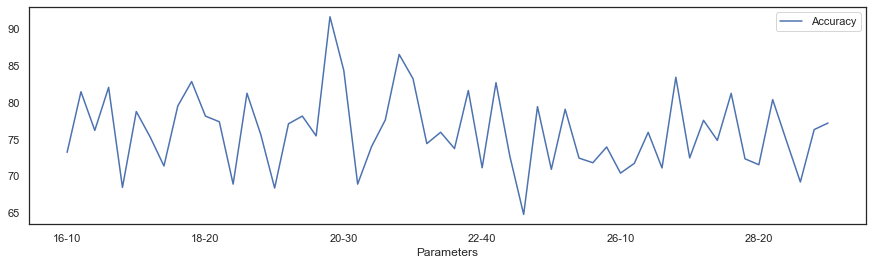

In [20]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [21]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 30, verbose=0)

In [22]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

In [23]:
# Scaling the predicted Output data back to original KWH Output scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

In [24]:
# Scaling the y_test Output data back to original KWH Output scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

In [25]:
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [26]:
TestingData=pd.DataFrame(data=Test_Data, columns=features)
TestingData['en_prod_kwh']=y_test_orig
TestingData['Predicted_en_prod_kwh']=Predictions
TestingData.head()

,windspeed_gr,direct_ground,atmo_press_hpa,air_t,rel_hum_2m,en_prod_kwh,Predicted_en_prod_kwh
0,3.6,230.0,971.2,13.7,89.9,86.0,193.822632
1,6.3,70.0,979.4,-3.4,93.0,32.0,151.240570
2,2.9,250.0,973.7,13.1,85.0,342.0,129.375671
3,3.7,280.0,962.2,16.8,72.9,280.0,185.883942
4,2.7,250.0,980.1,0.8,88.9,46.0,110.464729


In [27]:
# Computing the absolute percent error
APE=100*(abs(TestingData['en_prod_kwh']-TestingData['Predicted_en_prod_kwh'])/TestingData['en_prod_kwh'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: -inf


,windspeed_gr,direct_ground,atmo_press_hpa,air_t,rel_hum_2m,en_prod_kwh,Predicted_en_prod_kwh,APE
0,3.6,230.0,971.2,13.7,89.9,86.0,193.822632,125.375153
1,6.3,70.0,979.4,-3.4,93.0,32.0,151.240570,372.626781
2,2.9,250.0,973.7,13.1,85.0,342.0,129.375671,62.170856
3,3.7,280.0,962.2,16.8,72.9,280.0,185.883942,33.612878
4,2.7,250.0,980.1,0.8,88.9,46.0,110.464729,140.140716


In [28]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=4, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[25,35,45],
                      'epochs':[40,50,60],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/40
1621/1621 [==============================] - 2s 975us/step - loss: 0.8140 0s - loss: 0
Epoch 2/40
1621/1621 [==============================] - 2s 973us/step - loss: 0.7060
Epoch 3/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6907A: 0s - l
Epoch 4/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6922
Epoch 5/40
1621/1621 [==============================] - 2s 961us/step - loss: 0.6845
Epoch 6/40
1621/1621 [==============================] - 2s 996us/step - loss: 0.6849
Epoch 7/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6912
Epoch 8/40
1621/1621 [==============================] - 2s 984us/step - loss: 0.6990
Epoch 9/40
1621/1621 [==============================] - 2s 987us/step - loss: 0.6806
Epoch 10/40
1621/1621 [==============================] - 2s 940us/step - loss: 0.6872
Epoch 11/40
1621/1621 [==============================] - 2s 965us/step - loss: 0.6948
Epoch 12/40
1621/1621 [========================

1622/1622 [==============================] - 2s 1ms/step - loss: 0.7139
Epoch 15/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7251
Epoch 16/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7208
Epoch 17/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7207
Epoch 18/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7177
Epoch 19/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7250
Epoch 20/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7185
Epoch 21/40
1622/1622 [==============================] - 2s 993us/step - loss: 0.7153
Epoch 22/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7349
Epoch 23/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7206
Epoch 24/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7308
Epoch 25/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7229
Ep

1622/1622 [==============================] - 2s 1ms/step - loss: 0.6219
Epoch 29/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6292
Epoch 30/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6200
Epoch 31/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6332
Epoch 32/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6107
Epoch 33/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6249
Epoch 34/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6204
Epoch 35/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6242
Epoch 36/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6224
Epoch 37/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6217
Epoch 38/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6234
Epoch 39/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6207
Epoc

1621/1621 [==============================] - 2s 947us/step - loss: 0.7005
Epoch 32/50
1621/1621 [==============================] - 2s 934us/step - loss: 0.7020
Epoch 33/50
1621/1621 [==============================] - 2s 990us/step - loss: 0.6965
Epoch 34/50
1621/1621 [==============================] - 2s 970us/step - loss: 0.7012
Epoch 35/50
1621/1621 [==============================] - 2s 946us/step - loss: 0.7072
Epoch 36/50
1621/1621 [==============================] - 2s 970us/step - loss: 0.7026
Epoch 37/50
1621/1621 [==============================] - 2s 930us/step - loss: 0.7090
Epoch 38/50
1621/1621 [==============================] - 2s 977us/step - loss: 0.7015
Epoch 39/50
1621/1621 [==============================] - 2s 962us/step - loss: 0.7042
Epoch 40/50
1621/1621 [==============================] - 2s 943us/step - loss: 0.6989
Epoch 41/50
1621/1621 [==============================] - 2s 928us/step - loss: 0.7035
Epoch 42/50
1621/1621 [==============================] - 2s 941us/

1622/1622 [==============================] - 2s 989us/step - loss: 0.6929
Epoch 26/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6918
Epoch 27/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6907
Epoch 28/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7014
Epoch 29/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6870
Epoch 30/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6834
Epoch 31/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6844
Epoch 32/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6809
Epoch 33/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6898
Epoch 34/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6927
Epoch 35/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6810
Epoch 36/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6958
Ep

1621/1621 [==============================] - 1s 924us/step - loss: 0.6772
Epoch 20/60
1621/1621 [==============================] - 2s 968us/step - loss: 0.6713
Epoch 21/60
1621/1621 [==============================] - 2s 943us/step - loss: 0.6738
Epoch 22/60
1621/1621 [==============================] - 2s 941us/step - loss: 0.6724
Epoch 23/60
1621/1621 [==============================] - 2s 941us/step - loss: 0.6694
Epoch 24/60
1621/1621 [==============================] - 2s 928us/step - loss: 0.6727
Epoch 25/60
1621/1621 [==============================] - 2s 948us/step - loss: 0.6741
Epoch 26/60
1621/1621 [==============================] - 2s 939us/step - loss: 0.6753
Epoch 27/60
1621/1621 [==============================] - 2s 931us/step - loss: 0.6729
Epoch 28/60
1621/1621 [==============================] - 2s 927us/step - loss: 0.6807
Epoch 29/60
1621/1621 [==============================] - 2s 925us/step - loss: 0.6688
Epoch 30/60
1621/1621 [==============================] - 2s 934us/

1621/1621 [==============================] - 2s 928us/step - loss: 0.7278
Epoch 54/60
1621/1621 [==============================] - 2s 946us/step - loss: 0.7289
Epoch 55/60
1621/1621 [==============================] - 2s 959us/step - loss: 0.7155
Epoch 56/60
1621/1621 [==============================] - 2s 930us/step - loss: 0.7109
Epoch 57/60
1621/1621 [==============================] - 2s 940us/step - loss: 0.7178
Epoch 58/60
1621/1621 [==============================] - 2s 952us/step - loss: 0.7145
Epoch 59/60
1621/1621 [==============================] - 2s 944us/step - loss: 0.7110
Epoch 60/60
1621/1621 [==============================] - 2s 947us/step - loss: 0.7199
###################################################################### Accuracy: 130.08174236084295
Epoch 1/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.9322
Epoch 2/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7759
Epoch 3/60
1622/1622 [==============================] - 2s

1622/1622 [==============================] - 2s 1ms/step - loss: 0.7016
Epoch 28/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7104
Epoch 29/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7004
Epoch 30/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7101
Epoch 31/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7104
Epoch 32/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7048
Epoch 33/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7048
Epoch 34/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7090
Epoch 35/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6960
Epoch 36/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7013A: 0s - l
Epoch 37/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7005
Epoch 38/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.

1158/1158 [==============================] - 2s 1ms/step - loss: 0.8470
Epoch 2/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7289
Epoch 3/40
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7114
Epoch 4/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6899
Epoch 5/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6757
Epoch 6/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6904
Epoch 7/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6836
Epoch 8/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6811A: 0s - los
Epoch 9/40
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 10/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6926
Epoch 11/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6796
Epoch 12/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6847
E

1158/1158 [==============================] - 1s 1ms/step - loss: 0.7235
Epoch 17/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7237
Epoch 18/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7190
Epoch 19/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7244
Epoch 20/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7226
Epoch 21/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7173
Epoch 22/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7128
Epoch 23/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7226
Epoch 24/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7125A: 0s - loss
Epoch 25/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7216
Epoch 26/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7055
Epoch 27/40
1158/1158 [==============================] - 1s 1ms/step - loss:

1158/1158 [==============================] - 1s 1000us/step - loss: 0.6227
Epoch 31/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6098
Epoch 32/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6241
Epoch 33/40
1158/1158 [==============================] - 1s 996us/step - loss: 0.6193
Epoch 34/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6202
Epoch 35/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6137
Epoch 36/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6132
Epoch 37/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6173
Epoch 38/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6089
Epoch 39/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6131
Epoch 40/40
1158/1158 [==============================] - 1s 999us/step - loss: 0.6189
###################################################################### Accuracy: 

1158/1158 [==============================] - 1s 992us/step - loss: 0.7244
Epoch 35/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7255
Epoch 36/50
1158/1158 [==============================] - 1s 984us/step - loss: 0.7168
Epoch 37/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7088
Epoch 38/50
1158/1158 [==============================] - 1s 991us/step - loss: 0.7164
Epoch 39/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7215
Epoch 40/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7276
Epoch 41/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7173
Epoch 42/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7106
Epoch 43/50
1158/1158 [==============================] - 1s 988us/step - loss: 0.7157
Epoch 44/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7179
Epoch 45/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7

1158/1158 [==============================] - 1s 1ms/step - loss: 0.6989
Epoch 30/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7000
Epoch 31/50
1158/1158 [==============================] - 1s 994us/step - loss: 0.6987
Epoch 32/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6930
Epoch 33/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6944
Epoch 34/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7006
Epoch 35/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6905
Epoch 36/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6940
Epoch 37/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6877
Epoch 38/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6923
Epoch 39/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6898
Epoch 40/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6854
Ep

1158/1158 [==============================] - 1s 1ms/step - loss: 0.6757
Epoch 24/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6696
Epoch 25/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6756
Epoch 26/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6666
Epoch 27/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6731
Epoch 28/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6634
Epoch 29/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6613
Epoch 30/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6540A: 0s - los
Epoch 31/60
1158/1158 [==============================] - 1s 995us/step - loss: 0.6697
Epoch 32/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6658
Epoch 33/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6648A: 0s - loss: 0.6
Epoch 34/60
1158/1158 [==============================] - 1

1158/1158 [==============================] - 1s 1ms/step - loss: 0.7089
Epoch 59/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7075
Epoch 60/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7094
###################################################################### Accuracy: 127.42240139918195
Epoch 1/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.9999
Epoch 2/60
1158/1158 [==============================] - 1s 988us/step - loss: 0.8182
Epoch 3/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7665
Epoch 4/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7593
Epoch 5/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7422
Epoch 6/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7531
Epoch 7/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7411
Epoch 8/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0

1158/1158 [==============================] - 1s 1ms/step - loss: 0.6934
Epoch 33/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7072
Epoch 34/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7006
Epoch 35/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6973
Epoch 36/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7015
Epoch 37/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7074
Epoch 38/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7028
Epoch 39/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6923
Epoch 40/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7067
Epoch 41/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6988
Epoch 42/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7029
Epoch 43/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7012
Epoc

901/901 [==============================] - 2s 2ms/step - loss: 0.7030
Epoch 7/40
901/901 [==============================] - 2s 3ms/step - loss: 0.6997
Epoch 8/40
901/901 [==============================] - 2s 2ms/step - loss: 0.7036
Epoch 9/40
901/901 [==============================] - 1s 2ms/step - loss: 0.6878
Epoch 10/40
901/901 [==============================] - 1s 2ms/step - loss: 0.7026
Epoch 11/40
901/901 [==============================] - 2s 2ms/step - loss: 0.6951
Epoch 12/40
901/901 [==============================] - 1s 2ms/step - loss: 0.6998A: 1s
Epoch 13/40
901/901 [==============================] - 1s 2ms/step - loss: 0.6975
Epoch 14/40
901/901 [==============================] - 1s 2ms/step - loss: 0.7009
Epoch 15/40
901/901 [==============================] - 2s 2ms/step - loss: 0.7127
Epoch 16/40
901/901 [==============================] - 2s 2ms/step - loss: 0.7056
Epoch 17/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6978
Epoch 18/40
901/901 [=====

901/901 [==============================] - 1s 1ms/step - loss: 0.7161
Epoch 23/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7246A: 0s - loss: 0.72
Epoch 24/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7221A: 0s - loss: 0.
Epoch 25/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7243
Epoch 26/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7208
Epoch 27/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7232
Epoch 28/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7277
Epoch 29/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7178A: 0s - loss: 0.
Epoch 30/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7353
Epoch 31/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7249A: 0s 
Epoch 32/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7255
Epoch 33/40
901/901 [==============================] -

Epoch 39/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6227
Epoch 40/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6197A: 0s 
###################################################################### Accuracy: 59.42230769301309
Epoch 1/50
901/901 [==============================] - 2s 1ms/step - loss: 0.8765
Epoch 2/50
901/901 [==============================] - 1s 2ms/step - loss: 0.7379
Epoch 3/50
901/901 [==============================] - 2s 2ms/step - loss: 0.7118
Epoch 4/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6915
Epoch 5/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6836
Epoch 6/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6748
Epoch 7/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6867
Epoch 8/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6966
Epoch 9/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6914
Ep

901/901 [==============================] - 1s 1ms/step - loss: 0.7098
Epoch 47/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7149
Epoch 48/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7102
Epoch 49/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7067
Epoch 50/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7085
###################################################################### Accuracy: 129.28468961426745
Epoch 1/50
901/901 [==============================] - 1s 1ms/step - loss: 0.9223
Epoch 2/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7680
Epoch 3/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7576
Epoch 4/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7574
Epoch 5/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7681
Epoch 6/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7472A: 0s - 
Epoch 7/

Epoch 43/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6788
Epoch 44/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6911
Epoch 45/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6876
Epoch 46/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6857
Epoch 47/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6931
Epoch 48/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6823
Epoch 49/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6711
Epoch 50/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6801
###################################################################### Accuracy: 46.07826733949844
Epoch 1/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7742
Epoch 2/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6604
Epoch 3/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6475
Ep

901/901 [==============================] - 1s 1ms/step - loss: 0.6643
Epoch 40/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6592
Epoch 41/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6671
Epoch 42/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6551A:
Epoch 43/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6664
Epoch 44/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6636
Epoch 45/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6653
Epoch 46/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6742
Epoch 47/60
901/901 [==============================] - 2s 2ms/step - loss: 0.6687
Epoch 48/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6565A: 0s - loss: 0.6
Epoch 49/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6723
Epoch 50/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6750
Epoch 51/

901/901 [==============================] - 1s 1ms/step - loss: 0.7228A: 0s - loss:
Epoch 15/60
901/901 [==============================] - 1s 2ms/step - loss: 0.7313
Epoch 16/60
901/901 [==============================] - 2s 2ms/step - loss: 0.7319A:
Epoch 17/60
901/901 [==============================] - 2s 2ms/step - loss: 0.7292
Epoch 18/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7213
Epoch 19/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7278
Epoch 20/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7224
Epoch 21/60
901/901 [==============================] - 1s 2ms/step - loss: 0.7247
Epoch 22/60
901/901 [==============================] - 2s 2ms/step - loss: 0.7180
Epoch 23/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7213
Epoch 24/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7175
Epoch 25/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7261
Epoch 26/60
9

901/901 [==============================] - 1s 1ms/step - loss: 0.6845
Epoch 52/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6837
Epoch 53/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6835
Epoch 54/60
901/901 [==============================] - 2s 2ms/step - loss: 0.6985
Epoch 55/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6810
Epoch 56/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6840
Epoch 57/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6963
Epoch 58/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6924
Epoch 59/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6830
Epoch 60/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6875
###################################################################### Accuracy: 45.060190181110045
Epoch 1/60
901/901 [==============================] - 2s 1ms/step - loss: 0.7767
Epoch 2/60


1621/1621 [==============================] - 2s 1ms/step - loss: 0.6822A: 0s - loss: 0.
Epoch 28/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6787
Epoch 29/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6890
Epoch 30/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6744
Epoch 31/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6781
Epoch 32/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6724
Epoch 33/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6675
Epoch 34/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6750
Epoch 35/40
1621/1621 [==============================] - 2s 960us/step - loss: 0.6758
Epoch 36/40
1621/1621 [==============================] - 2s 956us/step - loss: 0.6864
Epoch 37/40
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6839
Epoch 38/40
1621/1621 [==============================] - 2s 1ms/step

1622/1622 [==============================] - 3s 1ms/step - loss: 0.9116
Epoch 2/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7193
Epoch 3/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7023
Epoch 4/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6989A: 1s - l
Epoch 5/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6981
Epoch 6/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7038
Epoch 7/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7020
Epoch 8/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6964
Epoch 9/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6992
Epoch 10/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6998
Epoch 11/40
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6933 ETA: 0s - loss: 
Epoch 12/40
1622/1622 [==============================] - 3s 2ms/step -

1621/1621 [==============================] - 2s 1ms/step - loss: 0.6969
Epoch 16/50
1621/1621 [==============================] - 2s 994us/step - loss: 0.6963
Epoch 17/50
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6896A: 0s - loss: 0.6
Epoch 18/50
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6855
Epoch 19/50
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6868
Epoch 20/50
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6866
Epoch 21/50
1621/1621 [==============================] - 2s 951us/step - loss: 0.6884
Epoch 22/50
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6852
Epoch 23/50
1621/1621 [==============================] - 2s 929us/step - loss: 0.6932
Epoch 24/50
1621/1621 [==============================] - 2s 940us/step - loss: 0.6816
Epoch 25/50
1621/1621 [==============================] - 2s 929us/step - loss: 0.6799
Epoch 26/50
1621/1621 [==============================] - 2s 9

1622/1622 [==============================] - 2s 1ms/step - loss: 0.7569A: 0s -
Epoch 9/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7490
Epoch 10/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7505
Epoch 11/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7596
Epoch 12/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7622A: 0s - l
Epoch 13/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7554
Epoch 14/50
1622/1622 [==============================] - 3s 2ms/step - loss: 0.7466
Epoch 15/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7506
Epoch 16/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7514
Epoch 17/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7449
Epoch 18/50
1622/1622 [==============================] - 3s 2ms/step - loss: 0.7574
Epoch 19/50
1622/1622 [==============================] - 2s 1ms/step - lo

1622/1622 [==============================] - 3s 1ms/step - loss: 0.7774
Epoch 2/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6807
Epoch 3/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6810A: 
Epoch 4/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6621
Epoch 5/50
1622/1622 [==============================] - 3s 2ms/step - loss: 0.6654
Epoch 6/50
1622/1622 [==============================] - 3s 2ms/step - loss: 0.6436
Epoch 7/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6321
Epoch 8/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6286
Epoch 9/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6420
Epoch 10/50
1622/1622 [==============================] - 3s 2ms/step - loss: 0.6193A: 0s - loss: 0.61 - ETA: 0s - loss: 0.617 - ETA: 0s - loss: - ETA: 0s - l
Epoch 11/50
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6258A: 0s -
Epoch 12/50


1621/1621 [==============================] - 3s 2ms/step - loss: 0.6587A: 
Epoch 45/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6730
Epoch 46/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6663
Epoch 47/60
1621/1621 [==============================] - 2s 992us/step - loss: 0.6667
Epoch 48/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6678
Epoch 49/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6661
Epoch 50/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6734
Epoch 51/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6676
Epoch 52/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6595
Epoch 53/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6828
Epoch 54/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6748
Epoch 55/60
1621/1621 [==============================] - 2s 1ms/step - loss: 0.6773

1622/1622 [==============================] - 2s 1ms/step - loss: 0.7124
Epoch 19/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7375
Epoch 20/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7191
Epoch 21/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7233
Epoch 22/60
1622/1622 [==============================] - 3s 2ms/step - loss: 0.7247
Epoch 23/60
1622/1622 [==============================] - 3s 2ms/step - loss: 0.7185
Epoch 24/60
1622/1622 [==============================] - 3s 2ms/step - loss: 0.7238
Epoch 25/60
1622/1622 [==============================] - 2s 2ms/step - loss: 0.7168
Epoch 26/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7201
Epoch 27/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7227
Epoch 28/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7297
Epoch 29/60
1622/1622 [==============================] - 3s 2ms/step - loss: 0.7184
Epoc

1622/1622 [==============================] - 2s 987us/step - loss: 0.7010
Epoch 53/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7060
Epoch 54/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6995
Epoch 55/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7116
Epoch 56/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6989
Epoch 57/60
1622/1622 [==============================] - 2s 990us/step - loss: 0.6854
Epoch 58/60
1622/1622 [==============================] - 2s 991us/step - loss: 0.7028
Epoch 59/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6828
Epoch 60/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.6930
###################################################################### Accuracy: 45.80106633815616
Epoch 1/60
1622/1622 [==============================] - 2s 1ms/step - loss: 0.7795
Epoch 2/60
1622/1622 [==============================] - 2s 1ms/step 

1158/1158 [==============================] - 1s 974us/step - loss: 0.6730
Epoch 27/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6648
Epoch 28/40
1158/1158 [==============================] - 1s 990us/step - loss: 0.6792
Epoch 29/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6652
Epoch 30/40
1158/1158 [==============================] - 1s 984us/step - loss: 0.6633
Epoch 31/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6610
Epoch 32/40
1158/1158 [==============================] - 1s 968us/step - loss: 0.6699
Epoch 33/40
1158/1158 [==============================] - 1s 968us/step - loss: 0.6731
Epoch 34/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6715
Epoch 35/40
1158/1158 [==============================] - 1s 981us/step - loss: 0.6623
Epoch 36/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6718
Epoch 37/40
1158/1158 [==============================] - 1s 986us/step - los

1158/1158 [==============================] - 1s 1ms/step - loss: 0.7075
###################################################################### Accuracy: 113.01846453793104
Epoch 1/40
1158/1158 [==============================] - 4s 2ms/step - loss: 0.9092
Epoch 2/40
1158/1158 [==============================] - 3s 2ms/step - loss: 0.7404
Epoch 3/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7090
Epoch 4/40
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7094
Epoch 5/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6960
Epoch 6/40
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6891
Epoch 7/40
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7010
Epoch 8/40
1158/1158 [==============================] - 3s 3ms/step - loss: 0.6978
Epoch 9/40
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7013A: 0s - loss: 0.7
Epoch 10/40
1158/1158 [==============================] - 2s 1ms/

1158/1158 [==============================] - 1s 1ms/step - loss: 0.6855
Epoch 12/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6645
Epoch 13/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6702
Epoch 14/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6729
Epoch 15/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6735A: 
Epoch 16/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6664
Epoch 17/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6730
Epoch 18/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6721
Epoch 19/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6729
Epoch 20/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.6761
Epoch 21/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.6651
Epoch 22/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6609
E

1158/1158 [==============================] - 2s 2ms/step - loss: 0.7406A: 0s - loss: 0.740
Epoch 6/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7539
Epoch 7/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7585
Epoch 8/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7530
Epoch 9/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7349
Epoch 10/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7427
Epoch 11/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7485
Epoch 12/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7498
Epoch 13/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7423
Epoch 14/50
1158/1158 [==============================] - 2s 2ms/step - loss: 0.7490
Epoch 15/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.7380
Epoch 16/50
1158/1158 [==============================] - 4s 3ms/step - lo

1158/1158 [==============================] - 2s 1ms/step - loss: 0.7772
Epoch 2/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6658
Epoch 3/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6387
Epoch 4/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6427
Epoch 5/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6394
Epoch 6/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6388
Epoch 7/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6301
Epoch 8/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6303
Epoch 9/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6351
Epoch 10/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6289
Epoch 11/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6357
Epoch 12/50
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6295
Epoch 13/50


1158/1158 [==============================] - 1s 1ms/step - loss: 0.6768
Epoch 47/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6630
Epoch 48/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6637
Epoch 49/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6582
Epoch 50/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6705
Epoch 51/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6546
Epoch 52/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6707
Epoch 53/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6610
Epoch 54/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6717
Epoch 55/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6768
Epoch 56/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6661
Epoch 57/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6634
Epoc

1158/1158 [==============================] - 1s 1ms/step - loss: 0.7399
Epoch 21/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7492
Epoch 22/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7446
Epoch 23/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7477
Epoch 24/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7261
Epoch 25/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7282
Epoch 26/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7327A: 0s - loss: 0.
Epoch 27/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7270
Epoch 28/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7355
Epoch 29/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7323
Epoch 30/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.7325
Epoch 31/60
1158/1158 [==============================] - 2s 1ms/step - l

1158/1158 [==============================] - 1s 1ms/step - loss: 0.6848
Epoch 56/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6866
Epoch 57/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6980
Epoch 58/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.6920
Epoch 59/60
1158/1158 [==============================] - 3s 3ms/step - loss: 0.6927A: 0s
Epoch 60/60
1158/1158 [==============================] - 2s 2ms/step - loss: 0.6895
###################################################################### Accuracy: 55.51351247233785
Epoch 1/60
1158/1158 [==============================] - 2s 1ms/step - loss: 0.7620
Epoch 2/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6440
Epoch 3/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6422
Epoch 4/60
1158/1158 [==============================] - 1s 1ms/step - loss: 0.6330A: 0s - loss: 0.6
Epoch 5/60
1158/1158 [==============================] -

901/901 [==============================] - 1s 1ms/step - loss: 0.6836
Epoch 31/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6778
Epoch 32/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6784
Epoch 33/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6798
Epoch 34/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6793
Epoch 35/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6826
Epoch 36/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6792
Epoch 37/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6684
Epoch 38/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6741
Epoch 39/40
901/901 [==============================] - 2s 2ms/step - loss: 0.6828
Epoch 40/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6809
###################################################################### Accuracy: 51.16553574229026
Epoch 1/40


901/901 [==============================] - 1s 1ms/step - loss: 0.7133
Epoch 6/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7069
Epoch 7/40
901/901 [==============================] - 2s 2ms/step - loss: 0.7107
Epoch 8/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6967
Epoch 9/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7123
Epoch 10/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7072
Epoch 11/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7131
Epoch 12/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7004
Epoch 13/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7043
Epoch 14/40
901/901 [==============================] - 1s 1ms/step - loss: 0.6950
Epoch 15/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7004
Epoch 16/40
901/901 [==============================] - 1s 1ms/step - loss: 0.7042
Epoch 17/40
901/901 [===========

901/901 [==============================] - 1s 1ms/step - loss: 0.7177
Epoch 23/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7039
Epoch 24/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7209
Epoch 25/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7180
Epoch 26/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7157
Epoch 27/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7197
Epoch 28/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7304
Epoch 29/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7114
Epoch 30/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7271
Epoch 31/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7172
Epoch 32/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7223
Epoch 33/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7092
Epoch 34/50
901/901 [=======

901/901 [==============================] - 1s 1ms/step - loss: 0.7216
Epoch 20/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7111
Epoch 21/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7036
Epoch 22/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7135
Epoch 23/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7107
Epoch 24/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7035
Epoch 25/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7049
Epoch 26/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7197A: 0s - loss: 
Epoch 27/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7114
Epoch 28/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7099A: 0s - los
Epoch 29/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7147
Epoch 30/50
901/901 [==============================] - 1s 1ms/step - loss: 0.7195
Epo

901/901 [==============================] - 1s 1ms/step - loss: 0.6279
Epoch 17/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6261
Epoch 18/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6302
Epoch 19/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6277
Epoch 20/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6289
Epoch 21/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6321
Epoch 22/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6273
Epoch 23/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6272
Epoch 24/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6338
Epoch 25/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6277
Epoch 26/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6406
Epoch 27/50
901/901 [==============================] - 1s 1ms/step - loss: 0.6308
Epoch 28/50
901/901 [=======

901/901 [==============================] - 1s 1ms/step - loss: 0.7739
Epoch 4/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7610
Epoch 5/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7631
Epoch 6/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7654
Epoch 7/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7467
Epoch 8/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7531
Epoch 9/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7555
Epoch 10/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7412
Epoch 11/60
901/901 [==============================] - 1s 980us/step - loss: 0.7509
Epoch 12/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7369
Epoch 13/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7401
Epoch 14/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7425
Epoch 15/60
901/901 [===========

901/901 [==============================] - 1s 1ms/step - loss: 0.7057
Epoch 41/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7022
Epoch 42/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7084
Epoch 43/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7148
Epoch 44/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7008
Epoch 45/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7083
Epoch 46/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7076
Epoch 47/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6987
Epoch 48/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6973A: 0s - loss: 0.696
Epoch 49/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7220
Epoch 50/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7159
Epoch 51/60
901/901 [==============================] - 1s 1ms/step - loss: 0.7025
Epoch 52/

901/901 [==============================] - 1s 1ms/step - loss: 0.6072
Epoch 17/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6026
Epoch 18/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6117
Epoch 19/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6083
Epoch 20/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6050
Epoch 21/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6055
Epoch 22/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6199
Epoch 23/60
901/901 [==============================] - 2s 2ms/step - loss: 0.6131
Epoch 24/60
901/901 [==============================] - 2s 2ms/step - loss: 0.6127
Epoch 25/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6087A: 0s -
Epoch 26/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6057
Epoch 27/60
901/901 [==============================] - 1s 1ms/step - loss: 0.6103
Epoch 28/60
901/901 [

{'Optimizer_trial': 'rmsprop', 'batch_size': 25, 'epochs': 40}

In [29]:
model.fit(X_train, y_train ,batch_size = 25, epochs = 60, verbose=0)

In [30]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

In [31]:
# Scaling the predicted Output data back to original KWH Output scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

In [32]:
# Scaling the y_test Output data back to original KWH Output scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

In [33]:
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [34]:
TestingData=pd.DataFrame(data=Test_Data, columns=features)
TestingData['en_prod_kwh']=y_test_orig
TestingData['Predicted_en_prod_kwh']=Predictions
TestingData.head()

,windspeed_gr,direct_ground,atmo_press_hpa,air_t,rel_hum_2m,en_prod_kwh,Predicted_en_prod_kwh
0,3.6,230.0,971.2,13.7,89.9,86.0,208.606857
1,6.3,70.0,979.4,-3.4,93.0,32.0,153.713226
2,2.9,250.0,973.7,13.1,85.0,342.0,133.126556
3,3.7,280.0,962.2,16.8,72.9,280.0,222.409378
4,2.7,250.0,980.1,0.8,88.9,46.0,131.027237
